In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import numpy as np
import pandas as pd
import cv2
import pickle
from google.colab.patches import cv2_imshow

In [4]:
%cd '/content/drive/My Drive/Colab/Datasets/sign_language'

/content/drive/My Drive/Colab/Datasets/sign_language


In [5]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [6]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [7]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [8]:
sam_img = np.array(train.iloc[0:1,1:])
sam_img = np.resize(sam_img,(28,28))
cv2_imshow(sam_img)

In [9]:
train.shape

(27455, 785)

In [10]:
test.shape

(7172, 785)

In [11]:
X_train = np.array(train,dtype='float32')
X_test = np.array(test,dtype='float32')

In [12]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

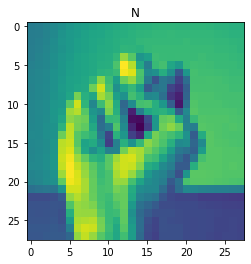

In [13]:
import matplotlib.pyplot as plt
import random

i = random.randint(0,27455)
plt.imshow(X_train[i,1:].reshape((28,28)))
plt.title(classes[int(X_train[i,0])])
plt.show()

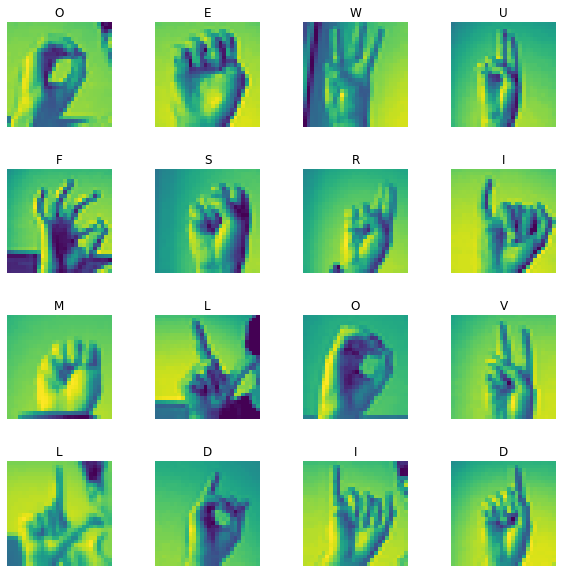

In [14]:
fig,ax = plt.subplots(4,4,figsize=(10,10))
ax = ax.ravel()
for r in range(4*4):
  i = random.randint(0,27455)
  ax[r].imshow(X_train[i,1:].reshape((28,28)))
  ax[r].set_title(classes[int(X_train[i,0])])
  ax[r].axis('off')
plt.subplots_adjust(hspace=0.4,wspace=0.3)

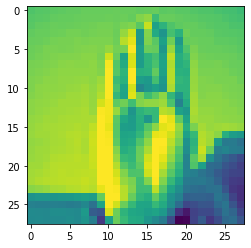

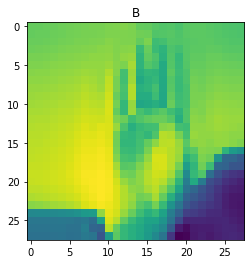

In [15]:
i = random.randint(0,27455)
kernel = np.ones((5,5),np.uint8)
img = X_train[i,1:].reshape((28,28))
plt.imshow(img)
plt.show()
img = cv2.bilateralFilter(img,9,50,50)
plt.imshow(img)
plt.title(classes[int(X_train[i,0])])
plt.show()

In [16]:
len(X_train)

27455

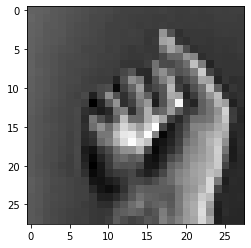

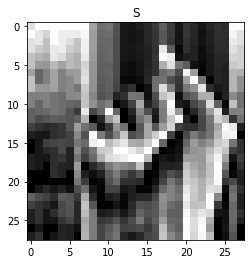

In [17]:
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
i = random.randint(0,27455)
img = X_train[i,1:].reshape((28,28))
plt.imshow(img,cmap = plt.cm.binary)
plt.show()
img = ss.fit_transform(img)
plt.imshow(img,cmap = plt.cm.binary)
plt.title(classes[int(X_train[i,0])])
plt.show()

In [18]:
#Our images dont need any transformation it only degrade the image quality

In [19]:
train_X = X_train[:,1:]/255.0
train_y = X_train[:,0].astype('int')
test_X = X_test[:,1:]/255.0
test_y = X_test[:,0].astype('int')

In [20]:
X = []
for i in range(len(train_X)):
  img = train_X[i].reshape((28,28))
  X.append(img)

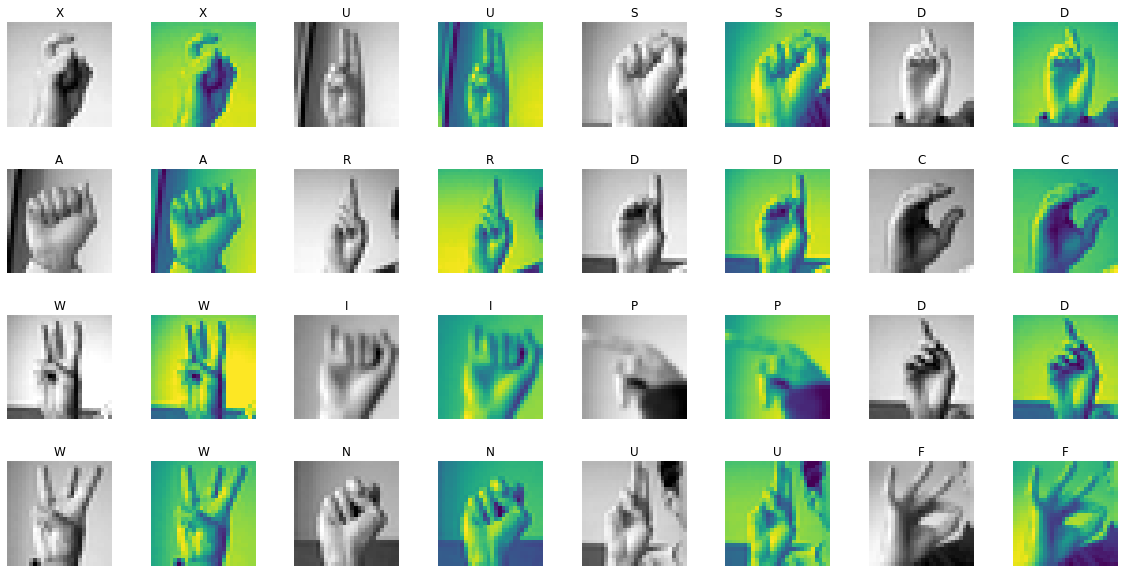

In [21]:
fig,ax = plt.subplots(4,8,figsize=(20,10))
ax = ax.ravel()
for r in range(0,2*4*4,2):
  i = random.randint(0,27455)
  ax[r].imshow(X[i],cmap='gray')
  ax[r].set_title(classes[train_y[i]])
  ax[r].axis('off')
  ax[r+1].imshow(X[i])
  ax[r+1].set_title(classes[train_y[i]])
  ax[r+1].axis('off')
plt.subplots_adjust(hspace=0.4,wspace=0.3)

In [22]:
y = train_y

In [23]:
from tensorflow import keras
from keras.layers import Conv2D,Flatten,Dense,Dropout,MaxPooling2D
from keras.models import Sequential
from keras import Input
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [24]:
X = np.array(X)

In [25]:
X = X.reshape(X.shape[0],28,28,1)
test_X = test_X.reshape(test_X.shape[0],28,28,1)

In [26]:
print(X.shape)
print(y.shape)

(27455, 28, 28, 1)
(27455,)


In [27]:
tar = pd.Series(y)
tar.value_counts() #dataset is balanced

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
dtype: int64

In [40]:
model = Sequential()
#model.add(Input(shape=(28,28,),batch_size=32))
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(25,activation='softmax'))

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 6, 128)        

In [42]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.0005),metrics=['accuracy'])

In [43]:
history = model.fit(X,y,validation_data=(test_X,test_y),batch_size=512,epochs=50,verbose=1)

Epoch 1/50
54/54 [==============================] - 1s 15ms/step - loss: 3.1901 - accuracy: 0.0500 - val_loss: 3.0297 - val_accuracy: 0.1175
Epoch 2/50
54/54 [==============================] - 1s 12ms/step - loss: 2.7075 - accuracy: 0.1965 - val_loss: 1.8541 - val_accuracy: 0.4714
Epoch 3/50
54/54 [==============================] - 1s 12ms/step - loss: 1.6876 - accuracy: 0.4611 - val_loss: 1.1788 - val_accuracy: 0.6510
Epoch 4/50
54/54 [==============================] - 1s 11ms/step - loss: 1.1050 - accuracy: 0.6363 - val_loss: 0.8103 - val_accuracy: 0.7557
Epoch 5/50
54/54 [==============================] - 1s 12ms/step - loss: 0.7478 - accuracy: 0.7470 - val_loss: 0.5595 - val_accuracy: 0.8416
Epoch 6/50
54/54 [==============================] - 1s 11ms/step - loss: 0.5356 - accuracy: 0.8135 - val_loss: 0.4267 - val_accuracy: 0.8681
Epoch 7/50
54/54 [==============================] - 1s 11ms/step - loss: 0.3912 - accuracy: 0.8684 - val_loss: 0.3519 - val_accuracy: 0.8947
Epoch 8/50
54

Text(0.5, 1.0, 'accuracy evaluation')

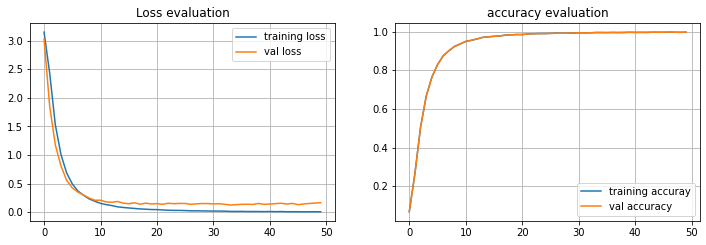

In [46]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.grid()
plt.title('Loss evaluation')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'],label='training accuray')
plt.plot(history.history['accuracy'],label='val accuracy')
plt.legend()
plt.grid()
plt.title("accuracy evaluation")

In [51]:
pred = model.predict_classes(test_X)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


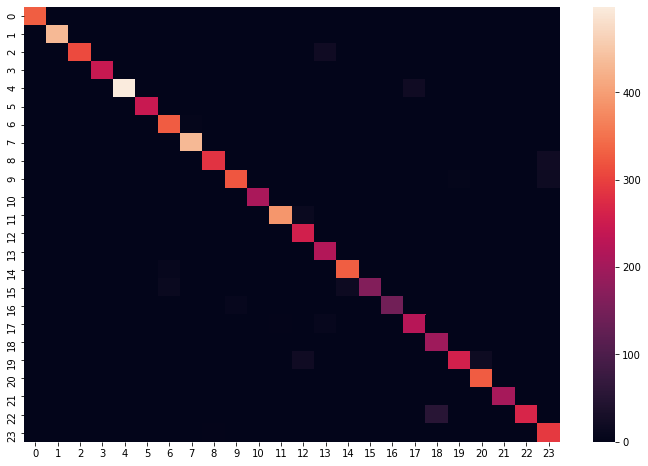

In [55]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(12,8))
cm = confusion_matrix(pred,test_y)
sns.heatmap(cm)

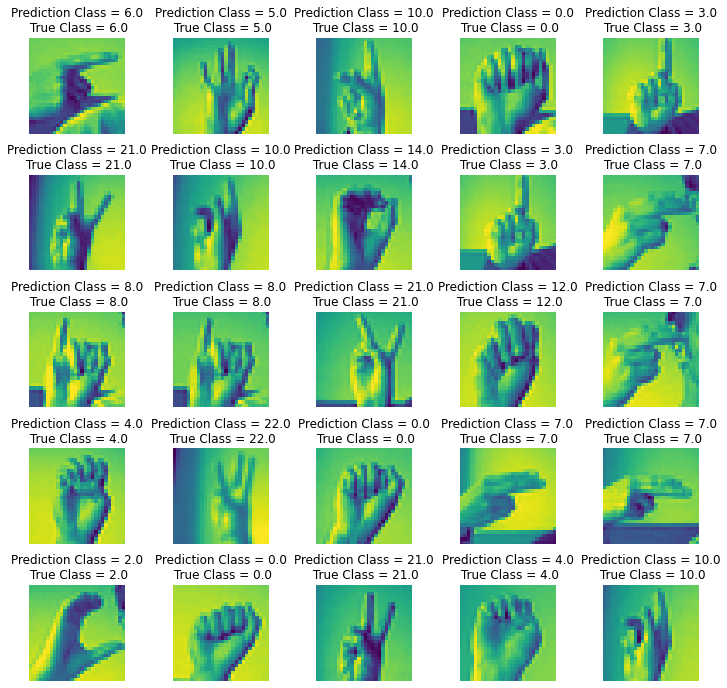

In [56]:
fig, axes = plt.subplots(5,5, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, 5*5):  
    axes[i].imshow(test_X[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {pred[i]:0.1f}\n True Class = {test_y[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5,hspace=0.3)

In [57]:
model.save('sign_classifier.h5')